In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout

In [2]:
# 2-2
_ , (v_images, v_labels) = emnist.load_data(type='letters')

def adjust_image(img):
    img = img.astype('float32')
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1)  # 3D -> 4D
    return img

v_images = adjust_image(v_images)

INFO:root:Loading dataset = emnist


In [4]:
# 2-3 데이터 로드 h5
model = keras.models.load_model('my-model.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 64)         

In [5]:
# 2-4 모델 평가 수행 : 평가에 대한 이미지 데이터와 정답레이블 검증
# 검증데이터에 대한 [손실함수], 정답률(정확도) 결과 표시
model.evaluate(v_images, v_labels)

650/650 [==============================] - 14s 21ms/step - loss: 0.1640 - accuracy: 0.9469


[0.16398216784000397, 0.9469230771064758]

In [6]:
# 2-5 검증데이터가 실제로 어떻게 예측하고 있는지를 리턴
res = model.predict(v_images)
print(res[1])

[6.50774361e-30 9.99984026e-01 3.52233220e-09 3.73292052e-16
 9.92229743e-10 8.40520578e-13 4.05352002e-10 6.37916884e-08
 3.23203011e-07 5.05971912e-14 2.62505776e-14 4.96352855e-11
 8.83899182e-13 1.02905759e-12 4.25172453e-10 4.89539405e-14
 4.83756146e-09 5.86505280e-08 1.54414993e-05 1.85648979e-12
 3.31538247e-12 4.95541637e-17 9.74643247e-21 3.10766834e-14
 1.11399646e-10 5.34063896e-12 2.65156874e-13]


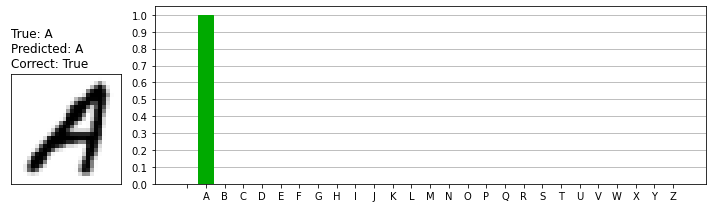

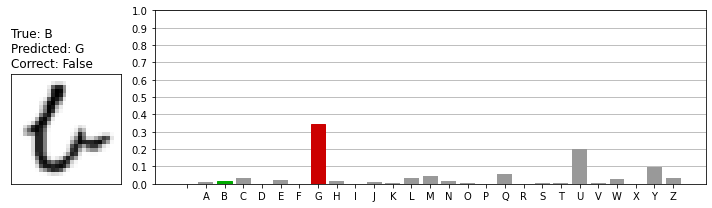

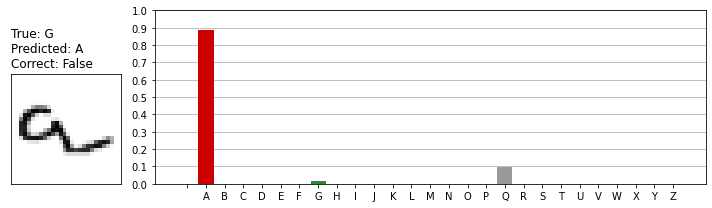

In [9]:
# 2-6 시각화

class_names = list(" ABCDEFGHIJKLMNOPQRSTUVWXYZ")
assert len(class_names) == 27

# (h, w, 1) -> (h,w)
def compatible_image(img):
    if img.ndim == 3 and img.shape[2] == 1:
        img = img.reshape(img.shape[0], img.shape[1])
    return img

def show_prediction(i, predictions, images, true_labels):
    prediction, image, true_label = predictions[i], images[i], true_labels[i]
    predicted_label = np.argmax(prediction)
    plt.rcParams["font.size"] = 10
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(10, 3), gridspec_kw={"width_ratios": [1, 5]}
    )
    label = "True: {}\nPredicted: {}\nCorrect: {}".format(
        class_names[true_label],
        class_names[predicted_label],
        true_label == predicted_label,
    )
    
    ax1.set_title(label, loc="left", fontsize=12)
    ax1.set_anchor("S")  # S=Bottom
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(compatible_image(image), cmap=plt.cm.binary)
    
    x_pos = np.arange(len(class_names))
    container = ax2.bar(x_pos, prediction, color="#999")
    container[predicted_label].set_color("#C00")  
    container[true_label].set_color("#0A0") 
    ax2.set_yticks(np.arange(0, 1.1, 0.1))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(class_names)
    ax2.grid(True, axis="y")
    ax2.set_axisbelow(True)
    
    plt.tight_layout()
    plt.show()
    
# step 2-6
show_prediction(1, res, v_images, v_labels)
show_prediction(1000, res, v_images, v_labels)
show_prediction(5480, res, v_images, v_labels)

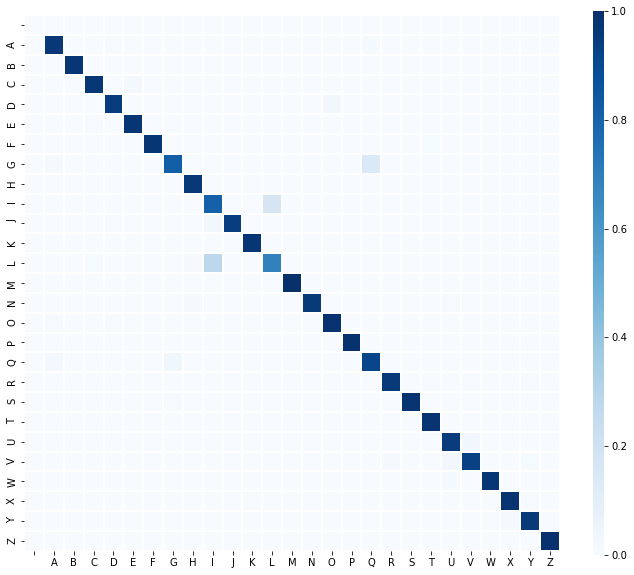

In [10]:
# 2-7 시각화를 바꾸어보자
import seaborn as sns

def show_confusion_matrix(predictions, true_labels, class_names):
    pred_labels = np.argmax(predictions, axis=1)
    cm = tf.math.confusion_matrix(true_labels, pred_labels)
    cm = cm / cm.numpy().sum(axis=1)[:, tf.newaxis]  # Normalize
    cm = np.nan_to_num(cm)
    
    plt.rcParams["font.size"] = 10
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        vmin=0.0,
        vmax=1.0,
        cmap="Blues",
        cbar_kws={"aspect": 50},
        square=True,
        linewidths=1,
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.show()
    
show_confusion_matrix(res, v_labels, class_names)

# 세로축 : 정답레이블, 가로축 : 예측레이블